In [ ]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [69]:
def read_log(filename):
    data = []
    #pattern = r'^Episode (\d+), steps: (\d+), Total Reward: ([-+]?\d*\.\d+|\d+), Difficulty: ([-+]?\d*\.\d+|\d+), Epsilon: ([-+]?\d*\.\d+|\d+), Action type counts: \[(\d+), (\d+)\], Speed: ([-+]?\d*\.\d+) episodes/s'
    #pattern = r'^Episode (\d+), steps: (\d+), Total Reward: ([-+]?\d*\.\d+|\d+), Epsilon: ([-+]?\d*\.\d+|\d+), Difficulty: ([-+]?\d*\.\d+|\d+), Speed: ([-+]?\d*\.\d+) episodes/s'
    pattern = r'^Episode (\d+), steps: (\d+), Total Reward: ([-+]?\d*\.\d+|\d+), Epsilon: ([-+]?\d*\.\d+|\d+), max_steps: ([-+]?\d*\.\d+|\d+), Speed: ([-+]?\d*\.\d+) episodes/s'

    with open(f'{filename}.txt', 'r', encoding='utf-16 le') as file:  # Replace with your file path
        for line in file:
            # Match the pattern to the current line
            match = re.match(pattern, line.strip())
            if match:
                # Extract and convert values
                episode = int(match.group(1))
                steps = int(match.group(2))
                total_reward = float(match.group(3))
                difficulty = float(match.group(5))
                epsilon = float(match.group(4))
                #action_type_counts = [int(match.group(6)), int(match.group(7))]
                speed = float(match.group(6))
                
                # Append as a dictionary to the data list
                data.append({
                    'Episode': episode,
                    'steps': steps,
                    'Total Reward': total_reward,
                    'max_steps': difficulty,
                    'Epsilon': epsilon,
                    #'Action type': action_type_counts,
                    'speed': speed
                })

    # Create the DataFrame
    df = pd.DataFrame(data)

    # Display the DataFrame
    print(df.head())  # Shows the first few rows

    return df

   Episode  steps  Total Reward  max_steps  Epsilon        speed
0        0      1         -0.04        1.0      1.0  100000000.0
1        1      1         -0.04        1.0      1.0  200000000.0
2        2      1         -0.04        1.0      1.0  300000000.0
3        3      1         -0.04        1.0      1.0  400000000.0
4        4      1         -0.04        1.0      1.0  500000000.0


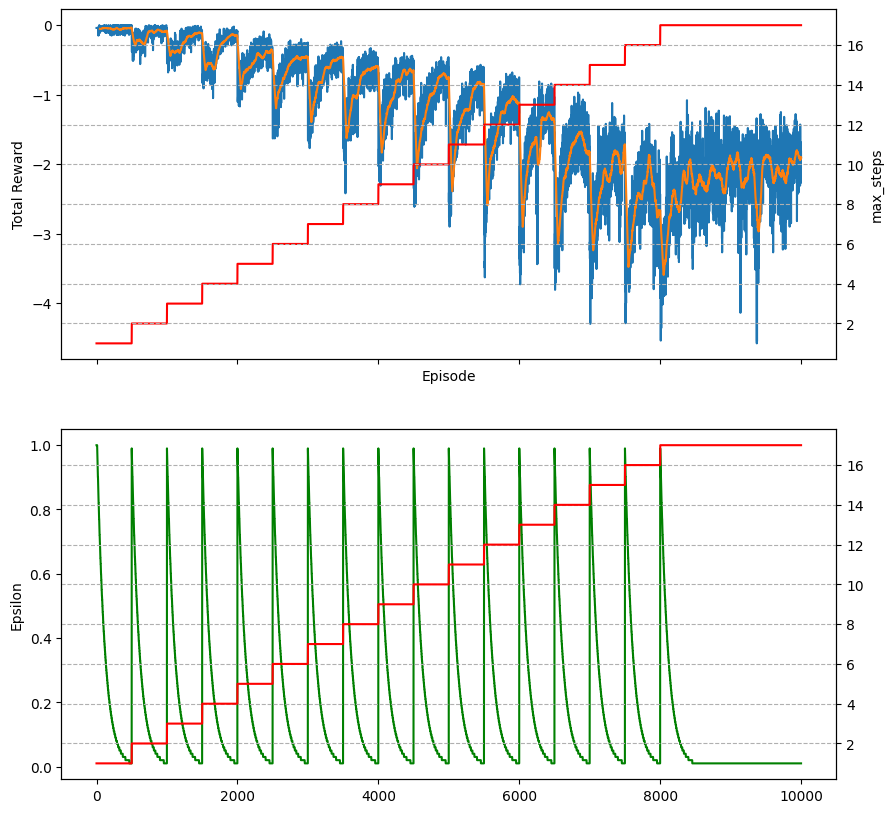

In [ ]:
df = read_log('training_log')

# Plot the grouped data on a separate scale
fig, ax = plt.subplots(nrows=2, figsize=(10, 10), sharex=True)
ax02 = ax[0].twinx()
ax12 = ax[1].twinx()

ax[0].plot(df['Total Reward'], zorder=2)
ax[0].plot(df['Total Reward'].rolling(window=50).mean(), zorder=2)
ax[0].set_xlabel('Episode')
ax[0].set_ylabel('Total Reward')
ax02.plot(df['max_steps'], color='red', zorder=1)
ax02.set_ylabel('max_steps')
ax02.grid(axis='y', zorder=1, ls='--')

ax[1].plot(df['Epsilon'], color='green')
ax[1].set_ylabel('Epsilon')
ax12.plot(df['max_steps'], color='red')
ax12.grid(axis='y', ls='--')

plt.show()

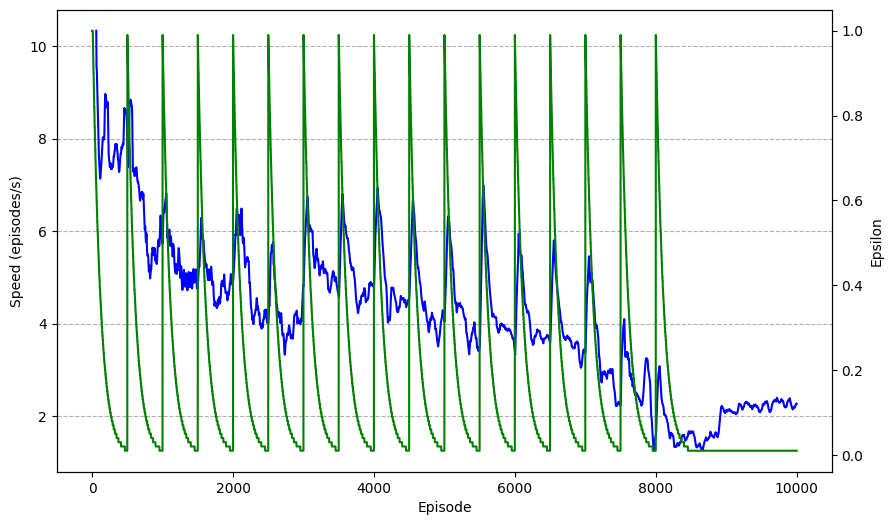

In [120]:
speed_clean = df['speed'].copy()
speed_clean.iloc[0:10] = np.nan # Remove the first few values which are very high

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
ax1.plot(speed_clean.rolling(window=50, min_periods=50).mean(), color='blue')
ax1.grid(axis='y', ls='--')
ax2.plot(df['Epsilon'], color='green')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Speed (episodes/s)')
ax2.set_ylabel('Epsilon')
plt.show()

(0.0, 1.0)

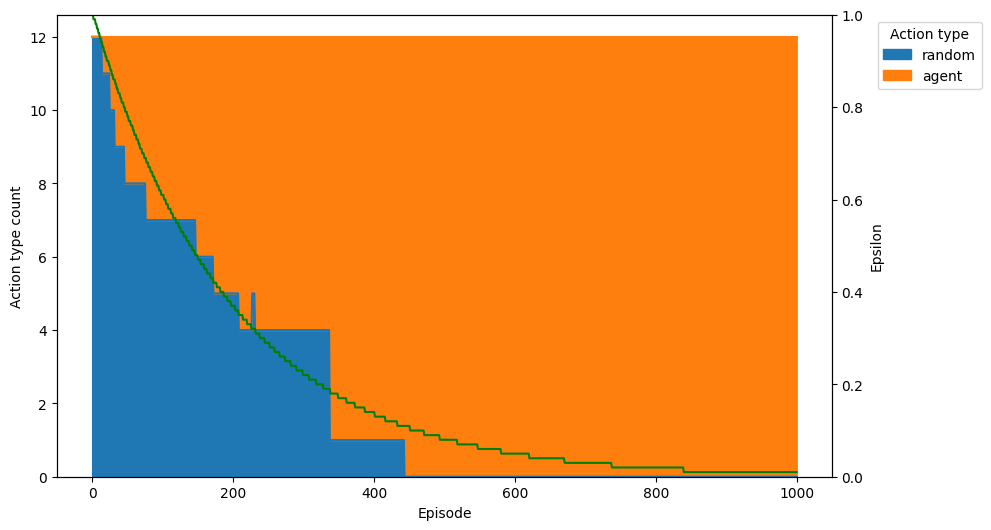

In [43]:
action_types = df['Action type'].apply(pd.Series)
fig, ax = plt.subplots(figsize=(10, 6))
action_types.plot(stacked=True, kind='area', ax=ax)
handles, labels = ax.get_legend_handles_labels()
new_labels = [{'0':'random', '1':'agent'}.get(label, label) for label in labels]
ax.legend(handles, new_labels, title='Action type', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Episode')
ax.set_ylabel('Action type count')
ax2 = ax.twinx()
ax2.plot(df['Epsilon'], color='green')
ax2.set_ylabel('Epsilon')
ax2.set_ylim(0, 1)